## Exploration of Housing Characteristics and Ownership across LA Neighborhoods and Census Tracts

This project focuses on analyzing housing characteristics and ownership trends across Los Angeles neighborhoods and census tracts. By exploring datasets containing information on housing types, construction years, and ownership rates, I aim to gain insights into the distribution and evolution of housing patterns in the area.

#### Author: Kristal Ombogo

### Importing Library

In [1]:
#importing the libraries
import pandas as pd
import geopandas as gpd
import folium
import plotly.express as px
import geopandas as gpd
# to provide basemaps 
import contextily as ctx
# to give more power to your figures (plots)
import matplotlib.pyplot as plt
import numpy as np

### Downloading Data


In [2]:
# Data on neighborhoods of LA
neighborhoods = gpd.read_file('data/LA_Times_Neighborhood_Boundaries.geojson')
# Data on housing characteristics
housing=pd.read_csv('data/HousingData_Data.csv')

/tmp/ipykernel_1689/2537522649.py:4: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383) have mixed types. Specify dtype option on import or set low_memory=False.
  housing=pd.re

### Cleaning up Data
The Housing dataset contains variables that I do not need, so I will create a subset of variables and rename them. I will also match the GEO ID to FIPS and change the data types to the appropriate type.

In [3]:
# I am looking at the first 5 rows of data.
housing.head()

,GEO_ID,NAME,S2504_C01_001E,S2504_C01_001M,S2504_C01_002E,S2504_C01_002M,S2504_C01_003E,S2504_C01_003M,S2504_C01_004E,S2504_C01_004M,...,S2504_C06_034M,S2504_C06_035E,S2504_C06_035M,S2504_C06_036E,S2504_C06_036M,S2504_C06_037E,S2504_C06_037M,S2504_C06_038E,S2504_C06_038M,Unnamed: 458
0,Geography,Geographic Area Name,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,NaN
1,0400000US06,California,13315822,16341,7717602,20881,974967,8559,307146,4418,...,0.2,0.2,0.1,0.0,0.1,1.2,0.1,5.2,0.1,NaN
2,0500000US06037,"Los Angeles County, California",3363093,4811,1641295,7223,217829,3694,87715,2323,...,0.3,0.1,0.1,0.0,0.1,0.4,0.1,8.4,0.2,NaN
3,1400000US06037101110,Census Tract 1011.10; Los Angeles County; Cali...,1551,130,976,129,38,32,84,68,...,11.5,0.0,5.5,0.0,5.5,0.0,5.5,2.0,3.3,NaN
4,1400000US06037101122,Census Tract 1011.22; Los Angeles County; Cali...,1383,160,1316,167,0,13,33,43,...,13.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,NaN


In [4]:
#I am deleting the first 9 digits of GEO ID to match with FIPS
housing['GEO_ID'] = housing['GEO_ID'].str[9:]

#I am renaming the "Geo ID" variable to "Geo FIPS"
housing = housing.rename(columns={'GEO_ID': 'Geo_FIPS'})
housing

,Geo_FIPS,NAME,S2504_C01_001E,S2504_C01_001M,S2504_C01_002E,S2504_C01_002M,S2504_C01_003E,S2504_C01_003M,S2504_C01_004E,S2504_C01_004M,...,S2504_C06_034M,S2504_C06_035E,S2504_C06_035M,S2504_C06_036E,S2504_C06_036M,S2504_C06_037E,S2504_C06_037M,S2504_C06_038E,S2504_C06_038M,Unnamed: 458
0,,Geographic Area Name,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,Estimate!!Occupied housing units!!Occupied hou...,Margin of Error!!Occupied housing units!!Occup...,...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,Estimate!!Percent renter-occupied housing unit...,Margin of Error!!Percent renter-occupied housi...,NaN
1,06,California,13315822,16341,7717602,20881,974967,8559,307146,4418,...,0.2,0.2,0.1,0.0,0.1,1.2,0.1,5.2,0.1,NaN
2,06037,"Los Angeles County, California",3363093,4811,1641295,7223,217829,3694,87715,2323,...,0.3,0.1,0.1,0.0,0.1,0.4,0.1,8.4,0.2,NaN
3,06037101110,Census Tract 1011.10; Los Angeles County; Cali...,1551,130,976,129,38,32,84,68,...,11.5,0.0,5.5,0.0,5.5,0.0,5.5,2.0,3.3,NaN
4,06037101122,Census Tract 1011.22; Los Angeles County; Cali...,1383,160,1316,167,0,13,33,43,...,13.0,0.0,11.0,0.0,11.0,0.0,11.0,0.0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,06037980038,Census Tract 9800.38; Los Angeles County; Cali...,0,13,0,13,0,13,0,13,...,**,-,**,-,**,-,**,-,**,NaN
2497,06037980039,Census Tract 9800.39; Los Angeles County; Cali...,0,13,0,13,0,13,0,13,...,**,-,**,-,**,-,**,-,**,NaN
2498,06037990100,Census Tract 9901; Los Angeles County; California,0,13,0,13,0,13,0,13,...,**,-,**,-,**,-,**,-,**,NaN
2499,06037990200,Census Tract 9902; Los Angeles County; California,0,13,0,13,0,13,0,13,...,**,-,**,-,**,-,**,-,**,NaN


In [5]:
#columns to keep in Housing Dataset
columns_to_keep= [
'Geo_FIPS',
'NAME',
'S2504_C01_001E',
'S2504_C02_001E',
'S2504_C05_001E',
'S2504_C06_001E',
'S2504_C03_001E',
'S2504_C04_002E',]

#add to new dataframe
housing2=housing[columns_to_keep]

# Renaming columns
housing2.columns = ['FIPS',
'NAME',
'Est_Total_Occupied',
'Percent_Total_Ocupied',
'Est_Renter_Occupied',
'Percent_Renter_Occupied',
'Est_Owner_Occupied',
'Percent_Owner_Occupied',] 

In [6]:
# Drop rows by index
rows_to_delete = [0, 1, 2]
housing2 = housing2.drop(rows_to_delete)

In [7]:
# See data types
housing2.info (verbose=True, show_counts= True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 3 to 2500
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   FIPS                     2498 non-null   object
 1   NAME                     2498 non-null   object
 2   Est_Total_Occupied       2498 non-null   object
 3   Percent_Total_Ocupied    2498 non-null   object
 4   Est_Renter_Occupied      2498 non-null   object
 5   Percent_Renter_Occupied  2498 non-null   object
 6   Est_Owner_Occupied       2498 non-null   object
 7   Percent_Owner_Occupied   2498 non-null   object
dtypes: object(8)
memory usage: 156.3+ KB


In [8]:
# Separate specific columns for integer
columns_to_convert_int = ['Est_Total_Occupied', 'Est_Renter_Occupied', 'Est_Owner_Occupied']
# Convert to integer
housing2[columns_to_convert_int] = housing2[columns_to_convert_int].astype(int)

# Separate specific columns for percent
columns_to_convert_float = ['Percent_Total_Ocupied', 'Percent_Renter_Occupied', 'Percent_Owner_Occupied']
# Replace non-numeric values with NaN
housing2[columns_to_convert_float] = housing2[columns_to_convert_float].replace('-', np.nan)
# Convert to float for decimal
housing2[columns_to_convert_float] = housing2[columns_to_convert_float].astype(float)

In [9]:
# Check my work 
housing2.info (verbose=True, show_counts= True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 3 to 2500
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FIPS                     2498 non-null   object 
 1   NAME                     2498 non-null   object 
 2   Est_Total_Occupied       2498 non-null   int64  
 3   Percent_Total_Ocupied    2498 non-null   float64
 4   Est_Renter_Occupied      2498 non-null   int64  
 5   Percent_Renter_Occupied  2498 non-null   float64
 6   Est_Owner_Occupied       2498 non-null   int64  
 7   Percent_Owner_Occupied   2428 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 156.3+ KB


### Create a map showing owner-occupied and renter-occupied housing based on LA County Neighborhood Boundaries

In [10]:
# Merge datasets (housing data and neighborhood boundaries
housing_merged = neighborhoods.merge(housing2,left_index=True,right_index=True)

In [11]:
#Create Choropleth Map
m = folium.Map(location=[34.052235, -118.243683], zoom_start=10)  # Los Angeles coordinates

# Add Choropleth layer for owner-occupied housing
folium.Choropleth(
    geo_data=housing_merged,
    name='Owner Occupied Housing',
    data=housing_merged,
    columns=['FIPS', 'Percent_Owner_Occupied'],
    key_on='feature.properties.FIPS',
    fill_color= 'YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Owner Occupied Housing (%)'
).add_to(m)

# Add Choropleth layer for renter-occupied housing
folium.Choropleth(
    geo_data=housing_merged,
    name='Renter Occupied Housing',
    data=housing_merged,
    columns=['FIPS', 'Percent_Renter_Occupied'],
    key_on='feature.properties.FIPS',
    fill_color= 'PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Renter Occupied Housing (%)'
).add_to(m)

# Display the map
m.save('ownership_map.html')


## Trying a new map for a clearer visualization of where renters vs homeowners are
The map I created does not make a clear distinction between renters and homeowners. Since these counties contain both, the colors are muddy. I now want to distinguish the two layers to make it clearer

In [12]:
# Add Layer Control to toggle between maps
folium.LayerControl().add_to(m)

# Display the map
m

#Save as new map
m.save('new_ownership_map.html')

### Using Census Tract Data 
Like the map on homeownership based on LA Neighborhoods, I am going to see where the proportion of renters are based on LA Census Tracts. The census tracts provides a standard to compare. 

In [13]:
# read in a geojson file 
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [14]:
# Subsetting the data to get FIPS and geometry
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [15]:
# Creating a FIPS column 
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [16]:
# Merging the dataframe containg housing characteristics with the dataframe previouly imported.
tracts_housing=tracts.merge(housing2,on="FIPS")

In [17]:
#Checking to see if the two data frames have been merged
tracts_housing.head()

,CT20,geometry,FIPS,NAME,Est_Total_Occupied,Percent_Total_Ocupied,Est_Renter_Occupied,Percent_Renter_Occupied,Est_Owner_Occupied,Percent_Owner_Occupied
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,Census Tract 1011.10; Los Angeles County; Cali...,1551,1551.0,711,711.0,840,90.8
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,Census Tract 1011.22; Los Angeles County; Cali...,1383,1383.0,344,344.0,1039,99.2
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,Census Tract 1012.20; Los Angeles County; Cali...,1349,1349.0,767,767.0,582,91.6
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,Census Tract 1012.21; Los Angeles County; Cali...,1424,1424.0,1077,1077.0,347,40.6
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,Census Tract 1012.22; Los Angeles County; Cali...,928,928.0,897,897.0,31,22.6


<Axes: >

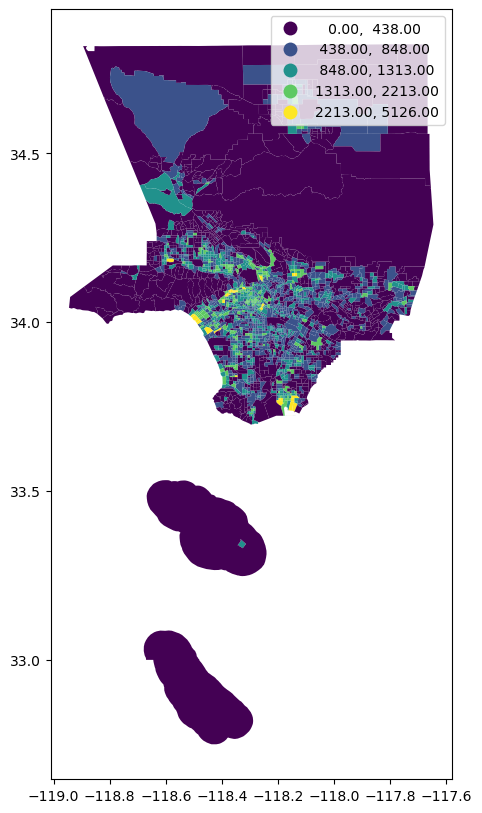

In [18]:
#Plot proportion of renter occupied housing
tracts_housing.plot(figsize=(12,10),
                 column='Percent_Renter_Occupied',
                 legend=True, 
                 scheme='NaturalBreaks')

### Understanding housing trends over time, especially for variables related to housing construction years.

For this new set of data analysis, I will start by cleaning the data set to focus on other housing characteristics for a temporal analysis. 

### Cleaning the data set

In [19]:
# separate columns
columns_to_keep = ['S2504_C01_001E',
'S2504_C01_009E', 
'S2504_C01_010E',
'S2504_C01_011E',
'S2504_C05_001E',
'S2504_C05_009E',
'S2504_C05_010E',
'S2504_C05_011E', 
'S2504_C03_001E',
'S2504_C03_009E',
'S2504_C03_010E',
'S2504_C03_011E',]

#add to new dataframe
housing_built=housing[columns_to_keep]

# Renaming columns
housing_built.columns = ['Total_Occupied',
'Recently_Built',
'Built_2010_2019',
'Built_2000_2009',
'Renter_Occupied',
'Recent_Rentals',
'Rentals_2010_2019', 
'Rentals_2000_2009',                       
'Owner_Occupied',
'Recent_Owners',
'Owners_2010_2019', 
'Owners_2000_2009']           

In [20]:
#Check the data types
housing_built.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Total_Occupied     2501 non-null   object
 1   Recently_Built     2501 non-null   object
 2   Built_2010_2019    2501 non-null   object
 3   Built_2000_2009    2501 non-null   object
 4   Renter_Occupied    2501 non-null   object
 5   Recent_Rentals     2501 non-null   object
 6   Rentals_2010_2019  2501 non-null   object
 7   Rentals_2000_2009  2501 non-null   object
 8   Owner_Occupied     2501 non-null   object
 9   Recent_Owners      2501 non-null   object
 10  Owners_2010_2019   2501 non-null   object
 11  Owners_2000_2009   2501 non-null   object
dtypes: object(12)
memory usage: 234.6+ KB


In [21]:
# I am looking at the first 5 rows of data.
housing_built.head()

,Total_Occupied,Recently_Built,Built_2010_2019,Built_2000_2009,Renter_Occupied,Recent_Rentals,Rentals_2010_2019,Rentals_2000_2009,Owner_Occupied,Recent_Owners,Owners_2010_2019,Owners_2000_2009
0,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Occupied housing units!!Occupied hou...,Estimate!!Renter-occupied housing units!!Occup...,Estimate!!Renter-occupied housing units!!Occup...,Estimate!!Renter-occupied housing units!!Occup...,Estimate!!Renter-occupied housing units!!Occup...,Estimate!!Owner-occupied housing units!!Occupi...,Estimate!!Owner-occupied housing units!!Occupi...,Estimate!!Owner-occupied housing units!!Occupi...,Estimate!!Owner-occupied housing units!!Occupi...
1,13315822,49182,733592,1467744,5908461,18002,359968,532383,7407361,31180,373624,935361
2,3363093,8191,126799,182907,1810929,5007,86061,93920,1552164,3184,40738,88987
3,1551,0,39,48,711,0,9,0,840,0,30,48
4,1383,0,5,222,344,0,0,78,1039,0,5,144


In [22]:
# Drop rows by index, like previous data frame
rows_to_delete = [0, 1, 2]
housing_built = housing_built.drop(rows_to_delete)

In [23]:
# Convert columns to integer data type
housing_built = housing_built.astype({col: 'int' for col in housing_built.columns})

In [24]:
#Check the data types
housing_built.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 3 to 2500
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Total_Occupied     2498 non-null   int64
 1   Recently_Built     2498 non-null   int64
 2   Built_2010_2019    2498 non-null   int64
 3   Built_2000_2009    2498 non-null   int64
 4   Renter_Occupied    2498 non-null   int64
 5   Recent_Rentals     2498 non-null   int64
 6   Rentals_2010_2019  2498 non-null   int64
 7   Rentals_2000_2009  2498 non-null   int64
 8   Owner_Occupied     2498 non-null   int64
 9   Recent_Owners      2498 non-null   int64
 10  Owners_2010_2019   2498 non-null   int64
 11  Owners_2000_2009   2498 non-null   int64
dtypes: int64(12)
memory usage: 234.3 KB


### Creating a Bargraph that will show Estimated Total Occupied Housing Built in Different Years

In [25]:
# Extracting relevant columns for total occupied housing
years = ['2020 or later', '2010-2019', '2000-2009']
total_counts = [
    housing_built['Recently_Built'].sum(),
    housing_built['Built_2010_2019'].sum(),
    housing_built['Built_2000_2009'].sum()
]

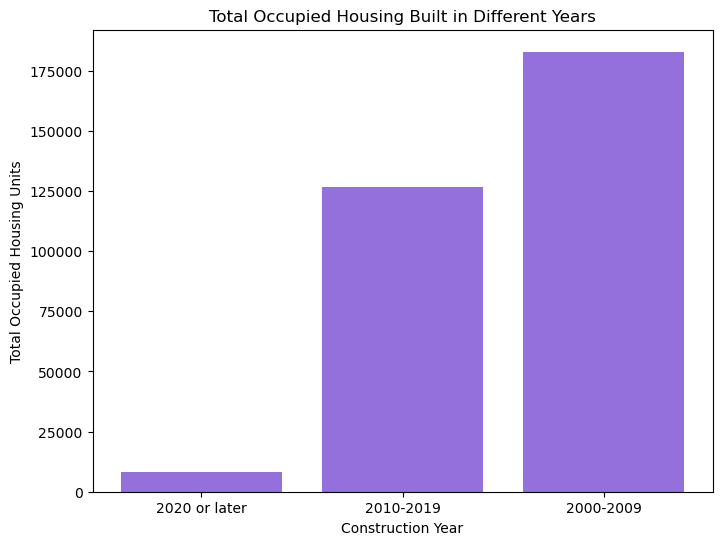

In [26]:
# Plotting the bar graph for total occupied housing
plt.figure(figsize=(8, 6))
plt.bar(years, total_counts, color='mediumpurple')
plt.title('Total Occupied Housing Built in Different Years')
plt.xlabel('Construction Year')
plt.ylabel('Total Occupied Housing Units')
plt.show()

### Creating a Bargraph that will show Estimated Renter Occupied Housing Built in Different Years

In [27]:
# Extracting relevant columns for renter occupied housing
years = ['2020 or later', '2010-2019', '2000-2009']
renter_counts = [
    housing_built['Recent_Rentals'].sum(),
    housing_built['Rentals_2010_2019'].sum(),
    housing_built['Rentals_2000_2009'].sum()
]

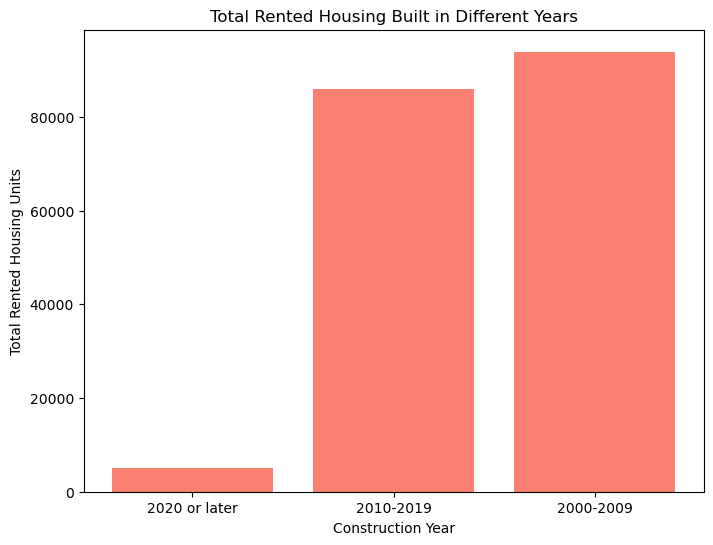

In [28]:
# Plotting the bar graph for renter occupied housing
plt.figure(figsize=(8, 6))
plt.bar(years, renter_counts, color='salmon')
plt.title('Total Rented Housing Built in Different Years')
plt.xlabel('Construction Year')
plt.ylabel('Total Rented Housing Units')
plt.show()

### Creating a Bargraph that will show Estimated Owner Occupied Housing Built in Different Years

In [29]:
# Extracting relevant columns for renter occupied housing
years = ['2020 or later', '2010-2019', '2000-2009']
owner_counts = [
    housing_built['Recent_Owners'].sum(),
    housing_built['Owners_2010_2019'].sum(),
    housing_built['Owners_2000_2009'].sum()
]

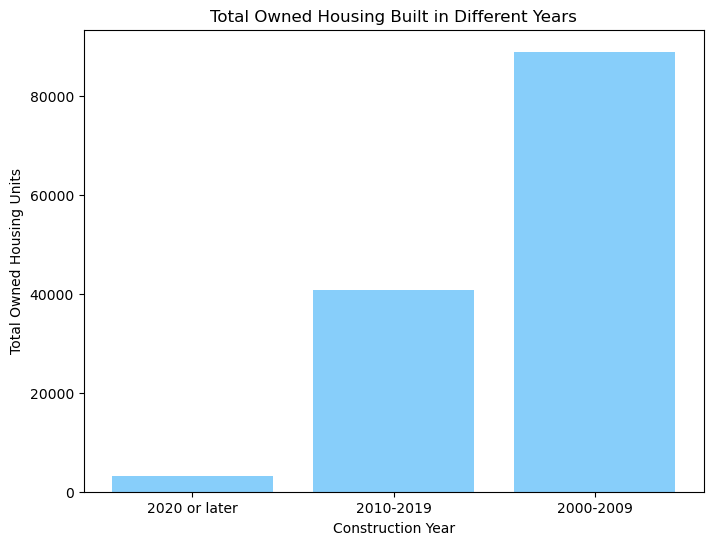

In [30]:
# Plotting the bar graph for owner occupied housing
plt.figure(figsize=(8, 6))
plt.bar(years, owner_counts, color='lightskyblue')
plt.title('Total Owned Housing Built in Different Years')
plt.xlabel('Construction Year')
plt.ylabel('Total Owned Housing Units')
plt.show()

### Plotting grouped bar chart

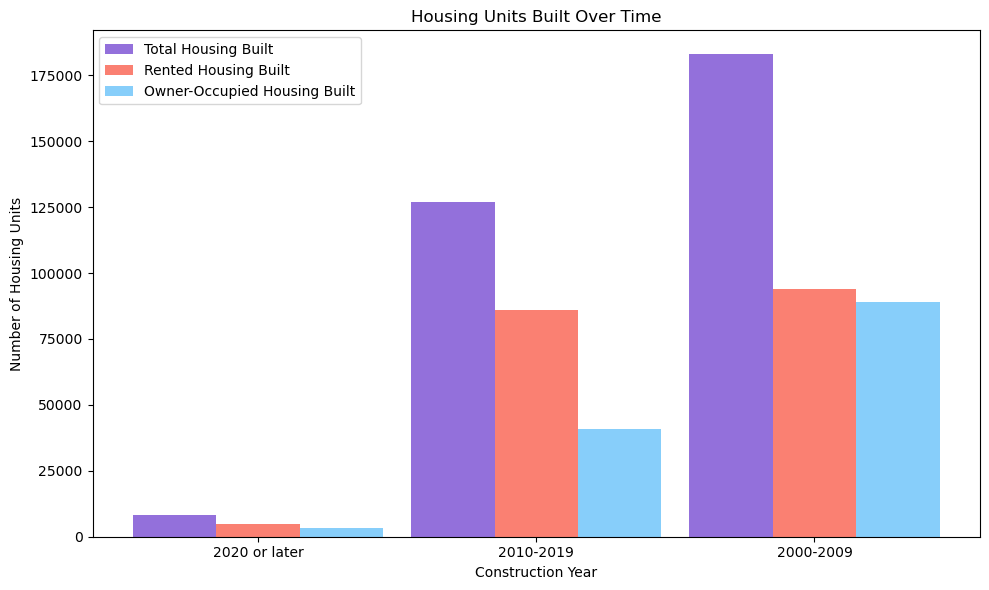

In [36]:
#define variables
years = ['2020 or later', '2010-2019', '2000-2009']
x = np.arange(len(years))
bar_width= 0.30

# Plotting grouped bar chart
plt.figure(figsize=(10, 6))

# Plotting bars for total housing built
plt.bar(x - bar_width, total_counts, width=bar_width, color='mediumpurple', label='Total Housing Built')

# Plotting bars for renter occupied housing
plt.bar(x, renter_counts, width=bar_width, color='salmon', label='Rented Housing Built')

# Plotting bars for owner occupied housing
plt.bar(x + bar_width, owner_counts, width=bar_width, color='lightskyblue', label='Owner-Occupied Housing Built')

# Adding labels, title, and legend
plt.xlabel('Construction Year')
plt.ylabel('Number of Housing Units')
plt.title('Housing Units Built Over Time')
plt.xticks(x, years)
plt.legend()

plt.tight_layout()
plt.show()